In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [3]:
import sys
import pandas as pd

sys.path.append('../../../param_search')
import param_search as ps

ps.set_verbose(False)
ps.set_backend('slurm')

In [4]:
csv_path = '2026-01-21_selected.csv'
sel = pd.read_csv(csv_path)
sel

,subject,metadata.category.set,metadata.category.len,metadata.category.set_f,metadata.category.len_f,metadata.category.valid,metadata.category.reasons,metadata.unit.value,metadata.unit.valid,metadata.unit.reasons,...,artifacts.valid,artifacts.reasons,valid,reasons,artifacts.scene.exc,paths.source_mask.exc,source_path,job_name,job_id,dims_error
0,wss.100f39dce7690f59efb94709f30ce0d2,"{'Recliner', 'Chair'}",2,"{'Recliner', 'Chair'}",2,True,(),0.012947,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,7.294375e-08
1,wss.101354f9d8dede686f7b08d9de913afe,"{'Speaker', '_Attributes'}",2,{'Speaker'},1,True,(),0.013620,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,1.319075e-08
2,wss.1029fd5d71a06ea32ea98d69e91ba870,{'ChestOfDrawers'},1,{'ChestOfDrawers'},1,True,(),0.019631,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,8.319422e-08
3,wss.102a6b7809f4e51813842bc8ef6fe18,"{'Desktop', 'Computer'}",2,"{'Desktop', 'Computer'}",2,True,(),0.025252,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,1.077898e-07
4,wss.107637b6bdf8129d4904d89e9169817b,{'Couch'},1,{'Couch'},1,True,(),0.022625,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,7.520307e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,wss.d81f943065391492a7e760c0b399301,"{'FoodItem', 'Bowl', '_StanfordSceneDBModels',...",4,"{'FoodItem', 'Bowl', 'FruitBowl'}",3,True,(),0.001381,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1112,wss.d8d4004791c4f61b80fa98b5eeb7036c,"{'_StanfordSceneDBModels', 'Book'}",2,{'Book'},1,True,(),0.000002,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1113,wss.e8add7acb28e2505fd40810f48721e8b,"{'Bed', 'DoubleBed'}",2,"{'Bed', 'DoubleBed'}",2,True,(),0.009245,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1114,wss.f6420a3a3addd027f67be63aca8832dd,"{'Recliner', 'Chair'}",2,"{'Recliner', 'Chair'}",2,True,(),0.027262,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,8786de37533664e5,35732850,NaN


In [5]:
base_dir = '2025-11-02_preprocess'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/preprocess.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config $NB/{config} --subject {subject}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-02_config.json')
len(grid)

1116

In [6]:
# changes:
# - image generation with solid texture networks (same variant)
# - use cell label as source of truth, map cell date to node data
# - use P0 scalar material fields in forward FEM simulation (need P1 in inverse for TV reg gradient)
# - reduce material vote rate 1e-3 to 1e-4 for more variation

base_dir = '2025-11-05_preprocess'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/preprocess.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config {config} --subject {subject}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-05_config.json')
len(grid)

1116

In [7]:
# changes:
# - post-CVPR pipeline refactoring + YAML config + overrides
# - simplified material catalog (5 E levels, no rho variation)

base_dir = '2025-11-20_preprocess'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/preprocess.py {config} --set dataset.examples.subjects={subject}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-20', config='2025-11-20_config.yaml')
len(grid)

1116

In [8]:
# changes:
# - different seed per subject for texture variation

base_dir = '2025-12-21_preprocess'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/preprocess.py {config} --set dataset.examples.subjects={subject}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-20', config='2025-11-20_config.yaml')
len(grid)

1116

In [9]:
# changes:
# - new config file (date typo fixed- its now 2026)
# - new materials catalog (uniform prior, density = 1000, uniform texture range = 1.0)

base_dir = '2026-01-15_preprocess'

# changes:
# - fix selectors: regenerate material mask, not just input image
# - try vote rate = 1.0 and assert num regions/materials > 1

base_dir = '2026-01-21_preprocess'

# changes:
# - use subject-specific seed for ALL random stages
# - new material mask selectors uniform-seed

base_dir = '2026-01-26_preprocess'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/preprocess.py {config} --set dataset.examples.subjects={subject}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, config='2026-01-15_config.yaml')
len(grid)

1116

In [36]:
%autoreload
try:
    jobs = ps.setup(base_dir, template, name_format, grid, overwrite=False)
except OSError:
    jobs = ps.load(base_dir)

jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.subject,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,b4ca70ab3dbd90e3,COMPLETED,1,37147814,gl001,00:00:37,INFO: /ocean/projects/asc170022p/mtragoza/lung...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.100f39dce7690f59efb94709f30ce0d2,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-26T15:26:51,False,None,None
1,07fc1e877d1423ce,COMPLETED,1,37147815,gl002,00:02:01,INFO: /ocean/projects/asc170022p/mtragoza/lung...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.101354f9d8dede686f7b08d9de913afe,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-26T15:26:51,False,None,None
2,aaf089d52ef43e90,COMPLETED,1,37147816,gl003,00:00:38,INFO: /ocean/projects/asc170022p/mtragoza/lung...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.1029fd5d71a06ea32ea98d69e91ba870,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-26T15:26:51,False,None,None
3,0fa3b40b29976ae9,COMPLETED,1,37147817,gl003,00:00:38,INFO: /ocean/projects/asc170022p/mtragoza/lung...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.102a6b7809f4e51813842bc8ef6fe18,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-26T15:26:51,False,None,None
4,6335856608118938,COMPLETED,1,37147818,gl003,00:00:38,INFO: /ocean/projects/asc170022p/mtragoza/lung...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.107637b6bdf8129d4904d89e9169817b,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-26T15:26:51,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0ac3ec288939d506,COMPLETED,1,37148927,v010,00:03:02,Saving /ocean/projects/asc170022p/mtragoza/lun...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.d81f943065391492a7e760c0b399301,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,2026-01-26T18:39:31,history,True,2026-01-27T01:45:17,False,None,None
1112,5a6b0065bd9849bb,COMPLETED,1,37148928,v013,00:01:44,Saving /ocean/projects/asc170022p/mtragoza/lun...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.d8d4004791c4f61b80fa98b5eeb7036c,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,2026-01-26T18:39:31,history,True,2026-01-27T01:45:17,False,None,None
1113,c0b93adfe897ff5b,FAILED,1,37148929,v015,00:00:09,INFO: /ocean/projects/asc170022p/mtragoza/lung...,"File ""/ocean/projects/asc170022p/mtragoza/lu...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.e8add7acb28e2505fd40810f48721e8b,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,2026-01-26T18:39:31,history,True,2026-01-27T01:45:17,False,None,None
1114,fb74464625412568,FAILED,1,37148930,v015,00:00:09,INFO: /ocean/projects/asc170022p/mtragoza/lung...,"File ""/ocean/projects/asc170022p/mtragoza/lu...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.f6420a3a3addd027f67be63aca8832dd,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,2026-01-26T18:39:31,history,True,2026-01-27T01:45:17,False,None,None


In [37]:
%autoreload
jobs = ps.recover(jobs)
jobs = ps.status(jobs)
jobs = ps.history(jobs)
jobs.groupby(['job_state']).count()

,job_name,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,script_path,...,params.subject,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
job_state,,,,,,,,,,,,,,,,,,,,,
COMPLETED,944,944,944,944,944,944,944,944,944,944,...,944,944,0,881,944,944,944,944,0,0
FAILED,172,172,172,172,172,172,172,172,172,172,...,172,172,0,163,172,172,172,172,0,0


In [38]:
jobs = ps.collect(jobs)

In [39]:
j = 0
failed_jobs = jobs.query('job_state == "FAILED"')
print(failed_jobs.iloc[j])
print(failed_jobs.iloc[j].stderr)

job_name                                           93d22faae451b1b4
job_state                                                    FAILED
n_submits                                                         1
job_id                                                     37147819
node_id                                                       gl002
runtime                                                    00:00:39
stdout            INFO: /ocean/projects/asc170022p/mtragoza/lung...
stderr              File "/ocean/projects/asc170022p/mtragoza/lu...
base_dir          /ocean/projects/asc170022p/mtragoza/lung-proje...
work_dir          /ocean/projects/asc170022p/mtragoza/lung-proje...
script_path       /ocean/projects/asc170022p/mtragoza/lung-proje...
output_path       /ocean/projects/asc170022p/mtragoza/lung-proje...
log_dir           /ocean/projects/asc170022p/mtragoza/lung-proje...
stdout_path       /ocean/projects/asc170022p/mtragoza/lung-proje...
stderr_path       /ocean/projects/asc170022p/mtr

In [52]:
edge_cases = failed_jobs[~failed_jobs.stderr.str.contains('single material')]
print(edge_cases.iloc[0])
print(edge_cases.iloc[0].stderr)

job_name                                           59d204448a99d72f
job_state                                                    FAILED
n_submits                                                         1
job_id                                                     37147869
node_id                                                       gl001
runtime                                                    00:01:10
stdout            Interpolating image at tetra cell centroids\nS...
stderr              File "/ocean/projects/asc170022p/mtragoza/ma...
base_dir          /ocean/projects/asc170022p/mtragoza/lung-proje...
work_dir          /ocean/projects/asc170022p/mtragoza/lung-proje...
script_path       /ocean/projects/asc170022p/mtragoza/lung-proje...
output_path       /ocean/projects/asc170022p/mtragoza/lung-proje...
log_dir           /ocean/projects/asc170022p/mtragoza/lung-proje...
stdout_path       /ocean/projects/asc170022p/mtragoza/lung-proje...
stderr_path       /ocean/projects/asc170022p/mtr

In [53]:
# mark jobs to resubmit
#jobs.loc[(jobs.job_state == 'FAILED'), 'job_id'] = pd.NA
#jobs.loc[:, 'job_id'] = pd.NA
edge_cases.loc[:, 'job_id'] = pd.NA
jobs = ps.submit(edge_cases)

In [16]:
sid = 'wss.54d2ff81249d67f18f5635ac8b18fdb9'
sid_job = jobs[jobs['params.subject'] == sid].T
print(sid_job)

                                                              300
job_name                                         abd42afe12351f74
job_state                                               COMPLETED
n_submits                                                       1
job_id                                                   37072926
node_id                                                      v019
runtime                                                  00:00:07
stdout              |   ├── '_class':        'WarpFEMSolver'\n...
stderr                                                           
base_dir        /ocean/projects/asc170022p/mtragoza/lung-proje...
work_dir        /ocean/projects/asc170022p/mtragoza/lung-proje...
script_path     /ocean/projects/asc170022p/mtragoza/lung-proje...
output_path     /ocean/projects/asc170022p/mtragoza/lung-proje...
log_dir         /ocean/projects/asc170022p/mtragoza/lung-proje...
stdout_path     /ocean/projects/asc170022p/mtragoza/lung-proje...
stderr_pat

In [54]:
import sys
import numpy as np
sys.path.append('../..')

import project
import project.validation
project.core.utils.set_verbose(False)

config = project.core.fileio.load_config('2026-01-15_config.yaml')
config['dataset']['examples']['subjects'] = csv_path

examples = project.api.get_examples(config['dataset'])
len(examples)

1116

In [55]:
# finalize subject list
good_subjects = set()

for ex in examples:

    mask_path = ex.paths['material_mask']
    try:
        mask = project.core.fileio.load_nibabel(mask_path).get_fdata()
    except FileNotFoundError:
        continue
    mask_labels, mask_counts = np.unique(mask[mask > 0], return_counts=True)

    try:
        mesh_path = ex.paths['interp_mesh']
        mesh = project.core.fileio.load_meshio(mesh_path)
    except FileNotFoundError:
        continue
    mesh_labels, mesh_counts = np.unique(mesh.cell_data['material'], return_counts=True)

    print(ex.subject, mask_counts, mesh_counts)
    
    if len(mask_labels) > 1 and len(mesh_labels) > 1:
        good_subjects.add(ex.subject)

len(good_subjects)

wss.100f39dce7690f59efb94709f30ce0d2 [514631 263996] [20420 11065]
wss.101354f9d8dede686f7b08d9de913afe [ 22904 394295  65600 289381] [ 2080 15405  3614 11545]
wss.1029fd5d71a06ea32ea98d69e91ba870 [ 16647 227109] [1067 8841]
wss.102a6b7809f4e51813842bc8ef6fe18 [228152   6203  20705 264909   8528] [14417   509  2091 15145  2403]
wss.107637b6bdf8129d4904d89e9169817b [  2494 275785] [  642 17302]
wss.133c16fc6ca7d77676bb31db0358e9c6 [71419 75257] [4709 5034]
wss.13b48456dad49f8762edbb9e1af21a03 [ 79656  27568 298299  75575] [ 4330  1702 12945  5353]
wss.1644df5fbb3b926029e82c550aa06a9d [182170  41032 217517   2790] [10457  2846 11843   668]
wss.18efc77e6837f7d311e76965808086c8 [260111  23602] [13955  3603]
wss.18f4a9ed04407da57bd55ed4ce08f048 [90803 44123 45037 29383 11132] [5402 2307 2492 3230 2042]
wss.1b36df7ed7ddd974c538fbfc1e40dbe0 [165007  26294  54546   4789  28503] [8078 3010 4141 1008 3070]
wss.1d054ec740f09093bc41182b106c7bda [44231  6991] [2035  643]
wss.1d2a6082238f011c22d3f17

945

In [57]:
for s in edge_cases['params.subject']:
    print(s, s in good_subjects)

wss.257aefd8c9c995d68cdb6066f06c695a True
wss.26205c6a0a25d5f884099151cc96de84 True


In [59]:
edge_cases

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.subject,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
55,59d204448a99d72f,FAILED,1,<NA>,gl001,00:01:10,Interpolating image at tetra cell centroids\nS...,"File ""/ocean/projects/asc170022p/mtragoza/ma...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.257aefd8c9c995d68cdb6066f06c695a,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-26T15:26:51,False,<NA>,<NA>
59,7b6bd7fdc0ad1379,FAILED,1,<NA>,gl003,00:01:10,Interpolating image at tetra cell centroids\nS...,"File ""/ocean/projects/asc170022p/mtragoza/ma...",/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,wss.26205c6a0a25d5f884099151cc96de84,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,None,history,True,2026-01-26T15:26:51,False,<NA>,<NA>


In [58]:
output = sel[sel.subject.isin(good_subjects)]
output.to_csv('2026-01-26_preprocessed.csv')

In [30]:
sys.path.append('../..')
import project
config = project.core.fileio.load_config('2026-01-15_config.yaml')
config['dataset']['examples']['subjects'] = '2026-01-24_preprocessed.csv'
config

{'dataset': {'name': 'ShapeNet',
  'root': '/ocean/projects/asc170022p/mtragoza/lung-project/data/ShapeNetSem',
  'examples': {'subjects': '2026-01-24_preprocessed.csv',
   'variant': '2026-01-15'},
  'metadata': {'parse_metadata': True,
   'unit_policy': 'prefer_metadata',
   'default_unit': 0.01},
  'selectors': {'material_mask': 'uniform'}},
 'preprocessing': {'binary_mask': {'foreground_filter': {'max_components': 1,
    'keep_largest': True},
   'background_filter': {'min_voxels': 30},
   'center_mask': True,
   'pad_amount': 0.37},
  'surface_mesh': {'run_pymeshfix': True},
  'region_mask': {'label_method': 'nearby_faces',
   'region_filter': {'min_voxels': 1000, 'keep_largest': False}},
  'volume_mesh': {'use_affine_spacing': False,
   'meshing_parameters': {'max_facet_distance': 0.75,
    'max_cell_circumradius': 5.0,
    'lloyd': True,
    'odt': True}},
  'material_mask': {'material_catalog': '/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/shapenet/2026-01-15_mate

In [31]:
examples = project.api.get_examples(config['dataset'])
len(examples)

959

In [32]:
ex = examples[0]
ex

Example(dataset='ShapeNet', subject='wss.100f39dce7690f59efb94709f30ce0d2', variant='2026-01-15', paths={'source_mesh': PosixPath('/ocean/projects/asc170022p/mtragoza/lung-project/data/ShapeNetSem/models-OBJ/models/100f39dce7690f59efb94709f30ce0d2.obj'), 'source_mask': PosixPath('/ocean/projects/asc170022p/mtragoza/lung-project/data/ShapeNetSem/models-binvox-solid/100f39dce7690f59efb94709f30ce0d2.binvox'), 'binary_mask': PosixPath('/ocean/projects/asc170022p/mtragoza/lung-project/data/ShapeNetSem/2026-01-15/100f39dce7690f59efb94709f30ce0d2/masks/mask.nii.gz'), 'region_mask': PosixPath('/ocean/projects/asc170022p/mtragoza/lung-project/data/ShapeNetSem/2026-01-15/100f39dce7690f59efb94709f30ce0d2/masks/mask_regions.nii.gz'), 'material_mask': PosixPath('/ocean/projects/asc170022p/mtragoza/lung-project/data/ShapeNetSem/2026-01-15/100f39dce7690f59efb94709f30ce0d2/masks/mask_regions_uniform.nii.gz'), 'surface_mesh': PosixPath('/ocean/projects/asc170022p/mtragoza/lung-project/data/ShapeNetSem/

(-0.054646655917167664, 2.2687387466430664)


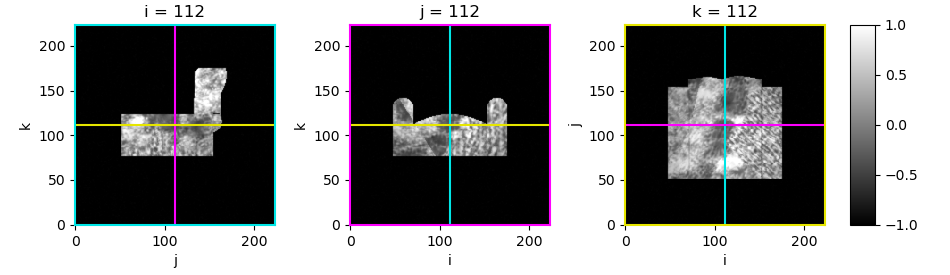

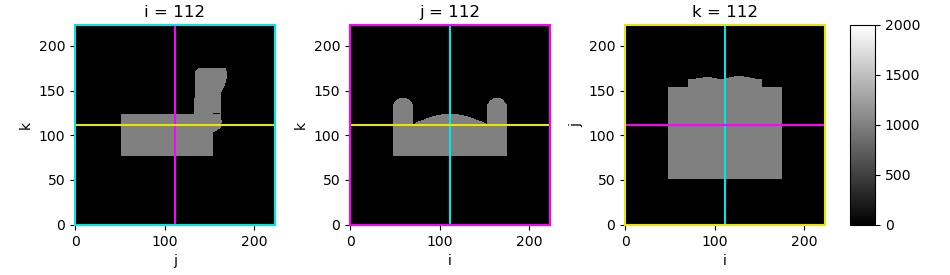

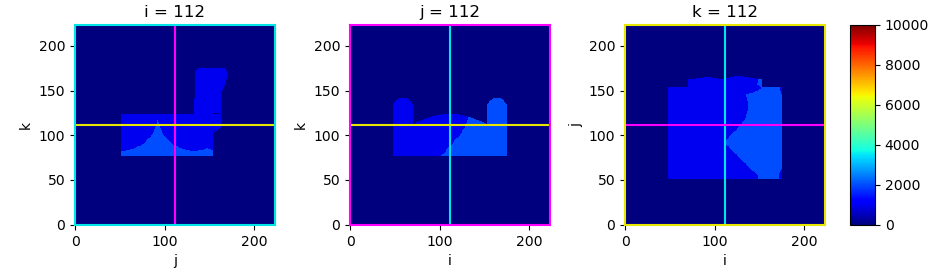

In [33]:
%matplotlib widget
import project.visual.matplotlib

image = project.core.fileio.load_nibabel(ex.paths['input_image']).get_fdata()
density = project.core.fileio.load_nibabel(ex.paths['density_field']).get_fdata()
elastic = project.core.fileio.load_nibabel(ex.paths['elastic_field']).get_fdata()

clim = (float(image.min()), float(image.max()))
print(clim)

_ = project.visual.matplotlib.show_image_slices(image - 1.0, cmap='gray', clim=(-1, 1), colors='cmy')
_ = project.visual.matplotlib.show_image_slices(density, cmap='gray', clim=(0, 2000), colors='cmy')
_ = project.visual.matplotlib.show_image_slices(elastic, cmap='jet',  clim=(0, 10000), colors='cmy')

array([0.   , 0.005, 0.02 , 0.045, 0.08 , 0.125, 0.18 , 0.245, 0.32 ,
       0.405, 0.5  , 0.595, 0.68 , 0.755, 0.82 , 0.875, 0.92 , 0.955,
       0.98 , 0.995, 1.   ])

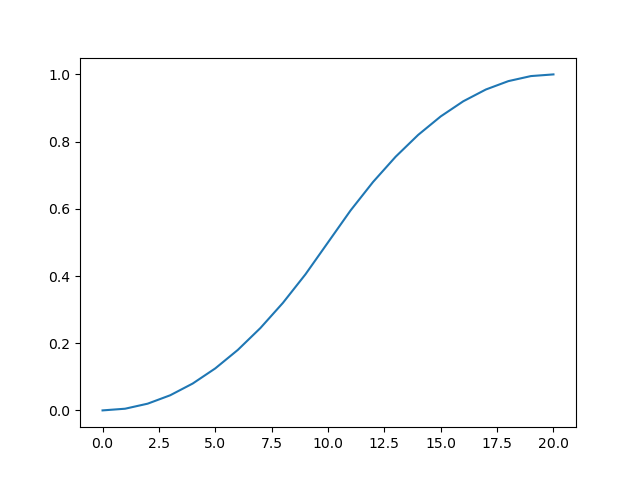

In [31]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

n = 11
x = np.arange(n)**2
x = (x + x.min()) / (x.max() - x.min()) / 2
x = np.concatenate([x, 1 - x[::-1][1::]])
ax.plot(x)
x

In [32]:
import project.visual.pyvista
image = project.core.fileio.load_nibabel(ex.paths['input_image']).get_fdata()
p = project.visual.pyvista.plot_volume(image, cmap='binary', clim=(0, 1), opacity=x)
p.show(jupyter_backend='trame')

Loading /ocean/projects/asc170022p/mtragoza/lung-project/data/ShapeNetSem/2026-01-15/100f39dce7690f59efb94709f30ce0d2/images/mask_regions_uniform_image.nii.gz


2026-01-24 12:29:35.422 (  92.310s) [    14EEC8D6E200]vtkXOpenGLRenderWindow.:1416  WARN| bad X server connection. DISPLAY=


Widget(value='<iframe id="pyvista-jupyter_trame__template_P_0x14ed3b27f790_0" src="https://ondemand.bridges2.p…